# Intervalo de confinaça

## O intervalo de confiança (IC) é uma faixa de valores, calculada a partir de dados amostrais, que se espera conter o valor verdadeiro de um parâmetro populacional desconhecido com um determinado nível de confiança. Ele proporciona uma estimativa do valor desse parâmetro e a incerteza associada a essa estimativa.

# Intervalo de Confiança na Estatística

## Componentes Principais do Intervalo de Confiança:

1. **Estimativa Pontual**: O valor específico calculado a partir da amostra, como a média amostral ($\bar{x}$) ou a proporção amostral ($\hat{p}$).

2. **Margem de Erro**: Uma medida da incerteza associada à estimativa pontual, geralmente representada como $E$. A margem de erro é influenciada pelo desvio padrão da amostra ($s$ ou $\sigma$) e pelo tamanho da amostra ($n$).

3. **Nível de Confiança**: A probabilidade de que o intervalo de confiança contenha o valor verdadeiro do parâmetro populacional. Comumente usado 90%, 95% ou 99%. O nível de confiança determina o valor crítico ($z^*$ ou $t^*$) a ser usado no cálculo.

## Fórmula Geral do Intervalo de Confiança:

Para a média de uma amostra grande ($n > 30$) com desvio padrão conhecido:

$$ IC = \bar{x} \pm z^* \left( \frac{\sigma}{\sqrt{n}} \right) $$

Para a média de uma amostra pequena ($n \leq 30$) com desvio padrão desconhecido:

$$ IC = \bar{x} \pm t^* \left( \frac{s}{\sqrt{n}} \right) $$

Para proporções:

$$ IC = \hat{p} \pm z^* \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} } $$

## Interpretação:

Se construirmos 100 intervalos de confiança com um nível de confiança de 95%, esperamos que aproximadamente 95 desses intervalos contenham o valor verdadeiro do parâmetro populacional.

## Exemplo Prático:

Suponha que você tem uma amostra de 100 pessoas e calcula a média de suas alturas como 170 cm, com um desvio padrão de 10 cm. Queremos um intervalo de confiança de 95%.

1. Estimativa pontual ($\bar{x}$) = 170 cm
2. Nível de confiança = 95%, então $z^* \approx 1.96$
3. Margem de erro = $1.96 \times \left( \frac{10}{\sqrt{100}} \right) = 1.96 \times 1 = 1.96$ cm

Intervalo de Confiança = 170 cm ± 1.96 cm = [168.04 cm, 171.96 cm]

Isso significa que estamos 95% confiantes de que a média verdadeira da altura da população está entre 168.04 cm e 171.96 cm.


Intervalo de Confiança de 80.0%: (11.80, 17.10)


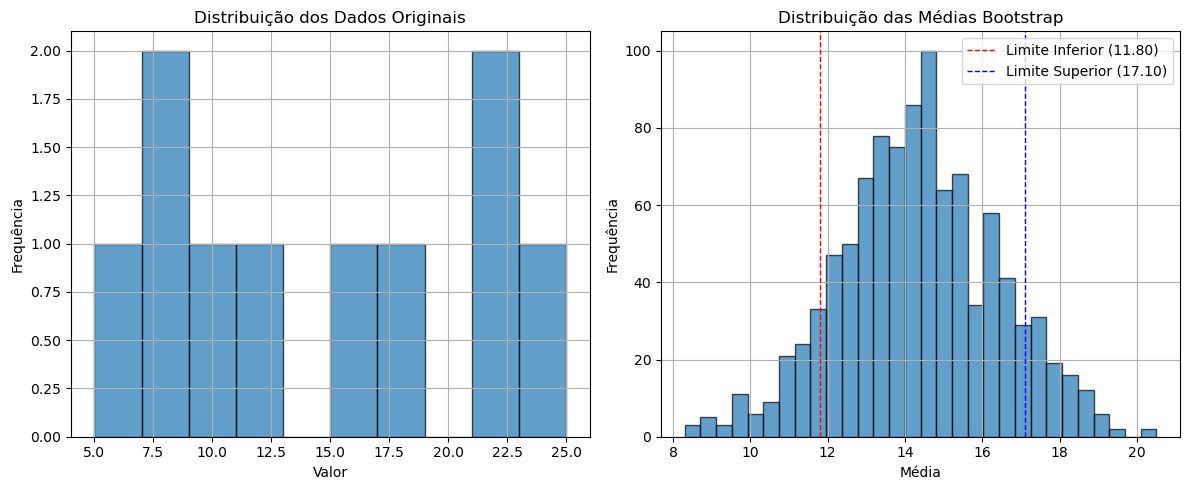

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Função para realizar o bootstraping
def bootstrap(data, num_iterations):
    bootstrap_means = []
    n = len(data)
    
    for _ in range(num_iterations):
        # Amostragem com substituição
        sample = np.random.choice(data, size=n, replace=True)
        # Calcula a média da amostra
        sample_mean = np.mean(sample)
        bootstrap_means.append(sample_mean)
    
    return bootstrap_means

# Solicita ao usuário o nível de confiança
confidence_level = float(input("Digite o nível de confiança (por exemplo, 95 para 95%): "))

# Verifica se o nível de confiança está dentro do intervalo válido
if not (0 < confidence_level < 100):
    raise ValueError("O nível de confiança deve estar entre 0 e 100.")

# Calcula os percentis para o intervalo de confiança
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile

# Dados de exemplo
data = np.array([5, 7, 8, 10, 12, 15, 18, 21, 22, 25])

# Número de iterações de bootstrap
num_iterations = 1000

# Realiza o bootstraping
bootstrap_means = bootstrap(data, num_iterations)

# Calcula o intervalo de confiança
lower_bound = np.percentile(bootstrap_means, lower_percentile)
upper_bound = np.percentile(bootstrap_means, upper_percentile)

print(f"Intervalo de Confiança de {confidence_level}%: ({lower_bound:.2f}, {upper_bound:.2f})")

# Cria uma figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histograma dos dados originais
axs[0].hist(data, bins=10, edgecolor='black', alpha=0.7)
axs[0].set_title('Distribuição dos Dados Originais')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frequência')
axs[0].grid(True)

# Histograma das médias bootstrap
axs[1].hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
axs[1].set_title('Distribuição das Médias Bootstrap')
axs[1].set_xlabel('Média')
axs[1].set_ylabel('Frequência')

# Adiciona o intervalo de confiança ao gráfico
axs[1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Limite Inferior ({lower_bound:.2f})')
axs[1].axvline(upper_bound, color='blue', linestyle='dashed', linewidth=1, label=f'Limite Superior ({upper_bound:.2f})')
axs[1].legend()
axs[1].grid(True)

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()
